<a href="https://colab.research.google.com/github/akshaya-nagarajan/DeepLearningProjects/blob/master/homework_0/SmallMachineLearningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [0]:
import tarfile
import urllib
#https://raw.githubusercontent.com/akshaya-nagarajan/DeepLearningProjects/master/homework_0/dataset/graduate-admissions/Admission_Predict.csv
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/akshaya-nagarajan/DeepLearningProjects/master/"
ADMISSION_PATH = DOWNLOAD_ROOT + "homework_0/dataset/graduate-admissions"

import pandas as pd
def load_admission_data(admission_path=ADMISSION_PATH):
    print(admission_path)
    csv_path = admission_path + "/Admission_Predict_new.csv"
    return pd.read_csv(csv_path)

In [39]:
admission = load_admission_data()
admission.head()

https://raw.githubusercontent.com/akshaya-nagarajan/DeepLearningProjects/master/homework_0/dataset/graduate-admissions


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Roundup,Chance_of_Admit_Class
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1.0,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1.0,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.5,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1.0,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.5,0


In [40]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Serial No.               400 non-null int64
GRE Score                400 non-null int64
TOEFL Score              400 non-null int64
University Rating        400 non-null int64
SOP                      400 non-null float64
LOR                      400 non-null float64
CGPA                     400 non-null float64
Research                 400 non-null int64
Chance of Admit          400 non-null float64
Roundup                  400 non-null float64
Chance_of_Admit_Class    400 non-null int64
dtypes: float64(5), int64(6)
memory usage: 34.5 KB


In [41]:
admission["SOP"].value_counts()

3.5    70
4.0    70
3.0    64
4.5    53
2.5    47
5.0    37
2.0    33
1.5    20
1.0     6
Name: SOP, dtype: int64

In [42]:
admission.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Roundup,Chance_of_Admit_Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350,0.725000,0.450000
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609,0.249058,0.498117
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000,0.500000,0.000000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000,0.500000,0.000000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000,0.500000,0.000000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000,1.000000,1.000000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000,1.000000,1.000000


Saving figure attribute_histogram_plots


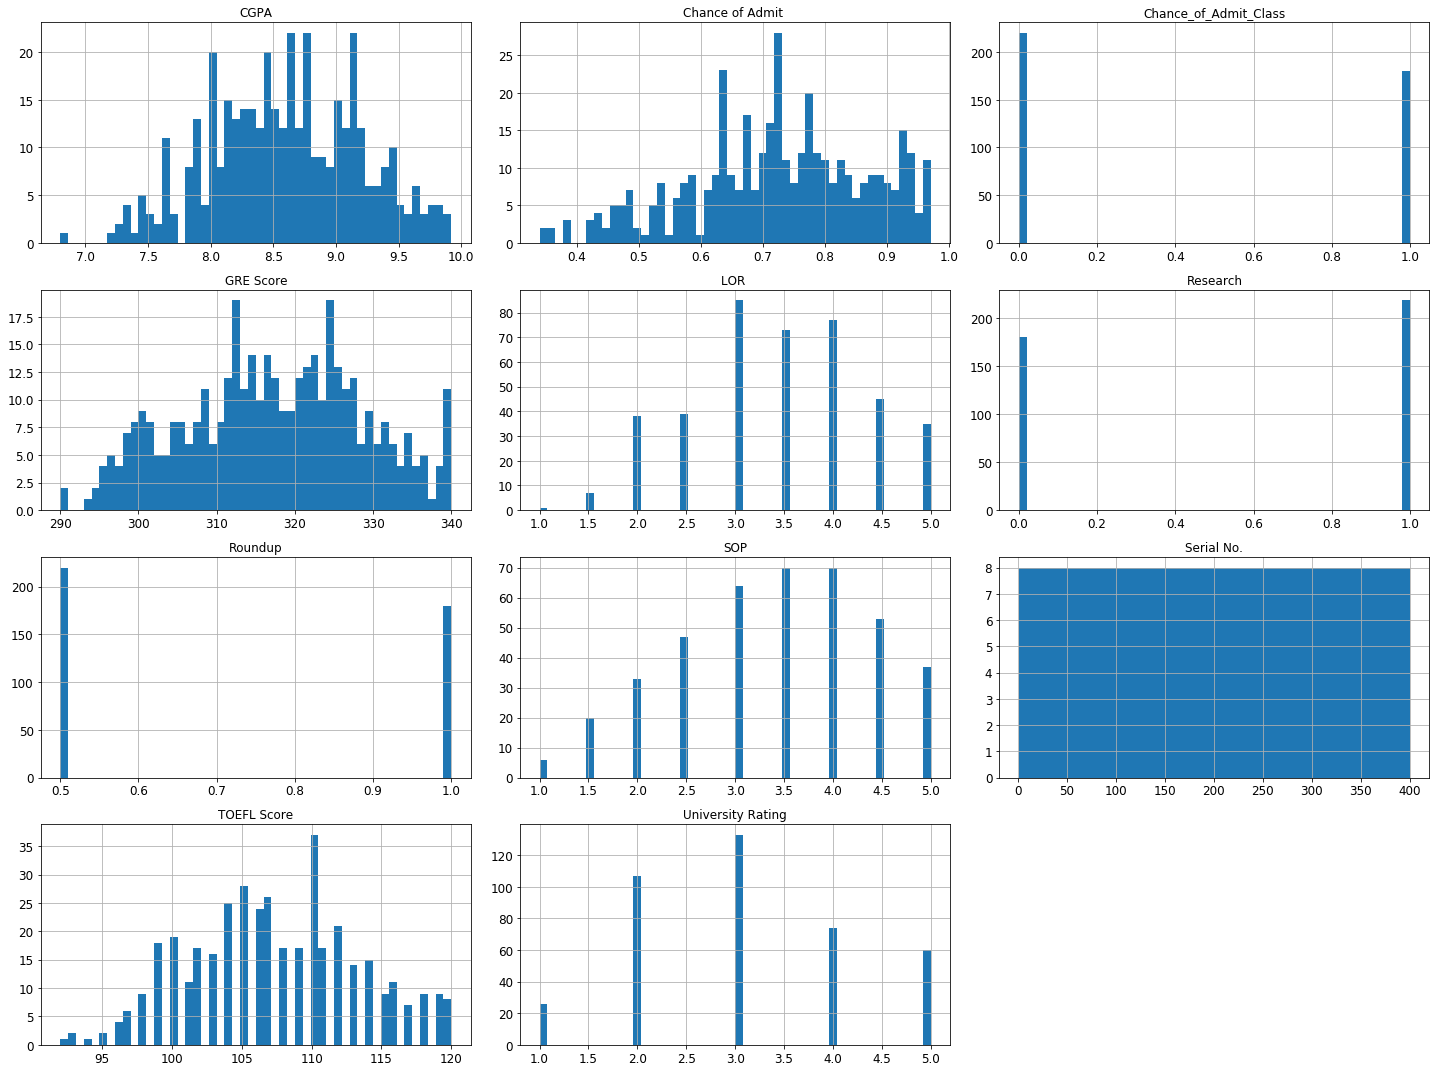

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
admission.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [0]:
np.random.seed(42)

In [0]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [46]:
train_set, test_set = split_train_test(admission, 0.2)
len(train_set)

320

In [47]:
len(test_set)

80

In [0]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [0]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [0]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [0]:
admission_with_id = admission.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(admission_with_id, 0.2, "index")

In [0]:
admission_with_id["id"] = admission["Serial No."] * 1
train_set, test_set = split_train_test_by_id(admission_with_id, 0.2, "id")

In [53]:
test_set.head()

,index,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Roundup,Chance_of_Admit_Class,id
3,3,4,322,110,3,3.5,2.5,8.67,1,0.80,1.0,1,4
4,4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.5,0,5
10,10,11,325,106,3,3.5,4.0,8.40,1,0.52,0.5,0,11
19,19,20,303,102,3,3.5,3.0,8.50,0,0.62,0.5,0,20
22,22,23,328,116,5,5.0,5.0,9.50,1,0.94,1.0,1,23


In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(admission, test_size=0.2, random_state=42)

In [55]:
test_set.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Roundup,Chance_of_Admit_Class
209,210,301,104,3,3.5,4.0,8.12,1,0.68,0.5,0
280,281,311,102,3,4.5,4.0,8.64,1,0.68,0.5,0
33,34,340,114,5,4.0,4.0,9.60,1,0.90,1.0,1
210,211,325,108,4,4.5,4.0,9.06,1,0.79,1.0,1
93,94,301,97,2,3.0,3.0,7.88,1,0.44,0.5,0


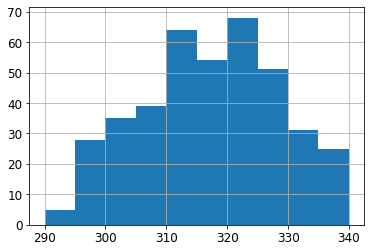

In [56]:
admission["GRE Score"].hist()

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
admission.columns = admission.columns.to_series().apply(lambda x: x.strip())
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(admission, admission["Chance_of_Admit_Class"]):
    strat_train_set = admission.loc[train_index]
    strat_test_set = admission.loc[test_index]

In [58]:
strat_test_set["Chance_of_Admit_Class"].value_counts() / len(strat_test_set)

0    0.55
1    0.45
Name: Chance_of_Admit_Class, dtype: float64

In [60]:
admission["Chance_of_Admit_Class"].value_counts() / len(admission)

0    0.55
1    0.45
Name: Chance_of_Admit_Class, dtype: float64

In [0]:
def admit_cat_proportions(data):
    return data["Chance_of_Admit_Class"].value_counts() / len(data)

train_set, test_set = train_test_split(admission, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": admit_cat_proportions(admission),
    "Stratified": admit_cat_proportions(strat_test_set),
    "Random": admit_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [64]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
0,0.55,0.55,0.5875,6.818182,0.0
1,0.45,0.45,0.4125,-8.333333,0.0


In [0]:
admission_strat = strat_train_set.copy()

Saving figure bad_visualization_plot


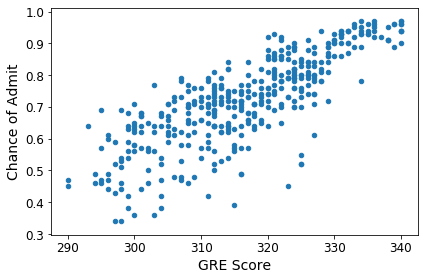

In [70]:
admission.plot(kind="scatter", x="GRE Score", y="Chance of Admit")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


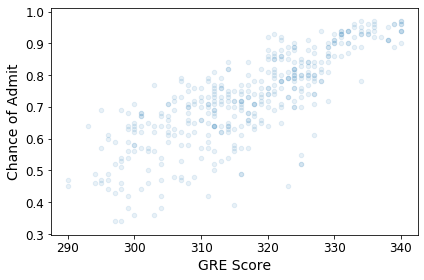

In [75]:
admission.plot(kind="scatter",  x="GRE Score", y="Chance of Admit", alpha=0.1)
save_fig("better_visualization_plot")

No handles with labels found to put in legend.


Saving figure admission_scatterplot


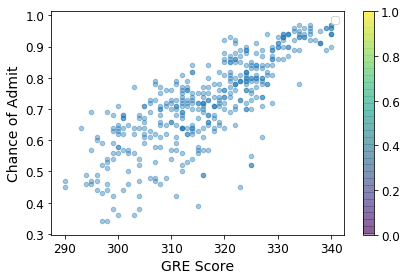

In [80]:
admission.plot(kind="scatter", x="GRE Score", y="Chance of Admit", alpha=0.4, cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()
save_fig("admission_scatterplot")

In [0]:
corr_matrix = admission.corr()

Saving figure scatter_matrix_plot


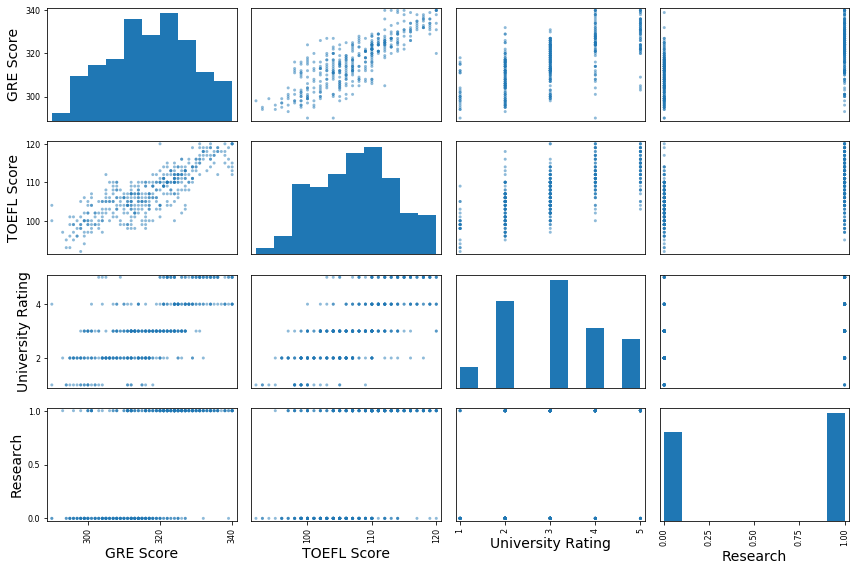

In [83]:
from pandas.plotting import scatter_matrix

attributes = ["GRE Score", "TOEFL Score", "University Rating", "Research"]
scatter_matrix(admission[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

In [85]:
sample_incomplete_rows = admission[admission.isnull().any(axis=1)].head()
sample_incomplete_rows

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Roundup,Chance_of_Admit_Class


In [87]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(admission, admission["Chance_of_Admit_Class"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
some_data = admission.iloc[:5]
some_labels = admission["Chance_of_Admit_Class"].iloc[:5]

print("Predictions:", lin_reg.predict(some_data))

Predictions: [1.00000000e+00 1.00000000e+00 4.10782519e-15 1.00000000e+00
 4.13558077e-15]


In [91]:
from sklearn.metrics import mean_squared_error

admission_predictions = lin_reg.predict(admission)
lin_mse = mean_squared_error(admission["Chance_of_Admit_Class"], admission_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.0778816423911355e-15

In [92]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(admission, admission["Chance_of_Admit_Class"])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [93]:
admission_predictions = tree_reg.predict(admission)
tree_mse = mean_squared_error(admission_predictions, admission_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0